## **Installation**

In [9]:
from scipy.stats import chi2_contingency
from scipy.stats import pearsonr
from golfutils import util_funcs
from scipy.stats import f_oneway
import matplotlib.pyplot as plt
from scipy.stats import norm
import seaborn as sns
import pandas as pd
import numpy as np
import warnings

warnings.filterwarnings("ignore")

## **Importing Data**

In [10]:
# Create a DataFrame from CSV data
df = pd.read_csv("strokes.csv")

## **Feature Engineering**

In [11]:
df['x'] = df['x'].str.replace(',', '').astype(float)
df['y'] = df['y'].str.replace(',', '').astype(float)

custom_colors = { 
    'Primary Rough': '#800080' ,
    'Intermediate Rough':'#0000FF' , 
    'Fairway':'#006400' ,
    'Green': '#90EE90' ,
    'Fairway Bunker':'#FFD700',
    'Green Side Bunker':'#FFD700',
    'Tree Outline':'#800080',
    'Fringe':'Pink',
    'Water':'Blue',
    'Water Drop':'Blue',}

def tempGeoDf(df, hole):
    temp_df = df[df['hole'] == hole]
    temp_df = temp_df[temp_df['x'] != 0]
    temp_df = temp_df[temp_df['y'] != 0]
    temp_df = temp_df[temp_df['to_location_scorer'] != 'Unknown']

    return temp_df

## **Add Background**

use shapely to find middle of convex hulls of green and fairway, then use that to make line between2, and orient that line north south for better viz

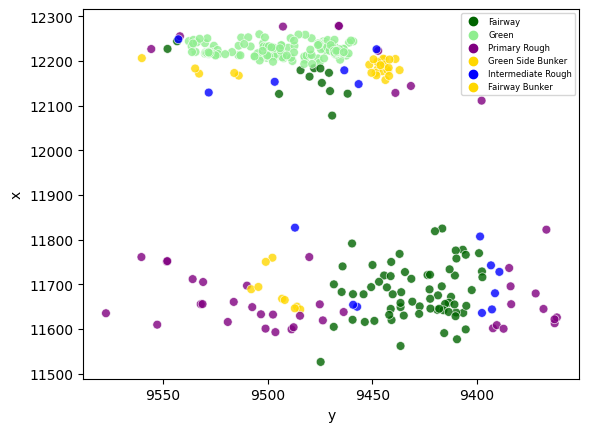

In [66]:
temp_df = tempGeoDf(df,13)

ax = sns.scatterplot(x='y', y='x', alpha=0.8, hue='to_location_scorer', data=temp_df, s=40,palette=custom_colors)
ax.legend(fontsize='6', loc='upper right')#title='Lie Location'
ax.invert_xaxis()
plt.show()

No handles with labels found to put in legend.


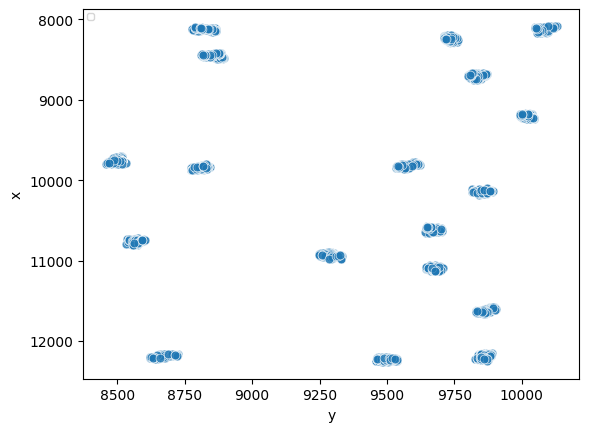

In [82]:
temp_df = df[df['to_location_scorer'] == 'Green']
temp_df = temp_df[temp_df['x'] != 0]
temp_df = temp_df[temp_df['y'] != 0]
temp_df = temp_df[temp_df['to_location_scorer'] != 'Unknown']


ax = sns.scatterplot(x='y', y='x', alpha=0.8, data=temp_df, s=40,palette=custom_colors)
ax.legend(fontsize='6', loc='upper left')#title='Lie Location'
ax.invert_yaxis()
plt.show()

No handles with labels found to put in legend.


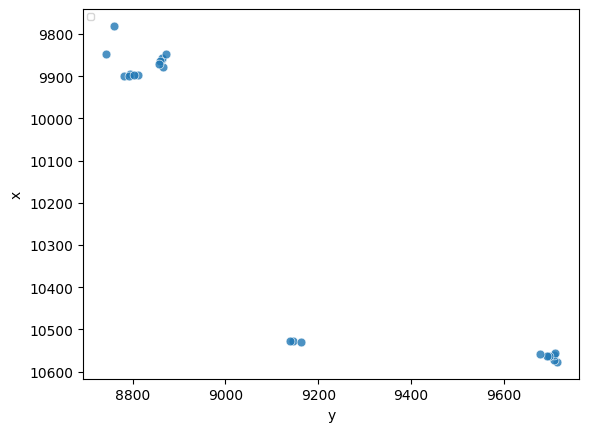

: 

In [84]:
temp_df = df[df['to_location_scorer'] == 'Water']
temp_df = temp_df[temp_df['x'] != 0]
temp_df = temp_df[temp_df['y'] != 0]
temp_df = temp_df[temp_df['to_location_scorer'] != 'Unknown']


ax = sns.scatterplot(x='y', y='x', alpha=0.8, data=temp_df, s=40,palette=custom_colors)
ax.legend(fontsize='6', loc='upper left')#title='Lie Location'
ax.invert_yaxis()
plt.show()

In [80]:
temp_df[['x','y','hole']].sort_values(by='x')

,x,y,hole
3630,9780.75,8759.96,6
1341,9846.70,8871.16,6
8162,9847.26,8742.51,6
586,9857.51,8863.35,6
229,9859.23,8864.51,6
6461,9863.11,8858.29,6
7657,9870.47,8856.53,6
377,9879.07,8865.86,6
5674,9894.90,8794.70,6
7169,9896.96,8802.68,6


In [81]:
temp_df

,tour_code,tour_description,year,tourn_id,player_id,course_id,permanent_tourn,first_name,last_name,round,...,dist_to_hole_after_shot,time,lie,elevation,slope,x,y,z,dist_from_center,dist_from_edge
229,R,PGA TOUR,2011,410,6567,688,60,Vijay,Singh,1,...,478,1302,Good,With,Level,9859.23,8864.51,471.0,469,0
377,R,PGA TOUR,2011,410,21731,688,60,Fredrik,Jacobson,1,...,666,1232,Good,With,Level,9879.07,8865.86,471.0,667,0
586,R,PGA TOUR,2011,410,22046,688,60,Geoff,Ogilvy,1,...,455,1301,Good,With,Level,9857.51,8863.35,471.0,444,0
1247,R,PGA TOUR,2011,410,24781,688,60,Hunter,Mahan,1,...,6550,1536,Good,With,Level,10528.78,9146.51,471.0,885,387
1341,R,PGA TOUR,2011,410,24925,688,60,Jonathan,Byrd,1,...,473,1336,Good,With,Level,9846.70,8871.16,471.0,397,0
1589,R,PGA TOUR,2011,410,26476,688,60,Chez,Reavie,1,...,6349,1651,Good,With,Level,10529.40,9163.28,471.0,879,370
1661,R,PGA TOUR,2011,410,27095,688,60,Nick,Watney,1,...,475,1658,Good,With,Level,10577.20,9713.49,471.0,358,262
2013,R,PGA TOUR,2011,410,31323,688,60,Gary,Woodland,1,...,483,1640,Good,With,Level,10571.70,9707.30,471.0,421,280
2310,R,PGA TOUR,2011,410,6567,688,60,Vijay,Singh,2,...,509,1253,Good,With,Level,9898.07,8812.81,471.0,403,0
2634,R,PGA TOUR,2011,410,21961,688,60,Charles,Howell III,2,...,6280,1725,Good,With,Level,10528.44,9138.84,471.0,829,399


In [14]:
from golfutils import util_funcs

In [15]:
temp_dfxx  = util_funcs.tempGeoDf(df,3)
temp_dfxx

,tour_code,tour_description,year,tourn_id,player_id,course_id,permanent_tourn,first_name,last_name,round,...,dist_to_hole_after_shot,time,lie,elevation,slope,x,y,z,dist_from_center,dist_from_edge
6,R,PGA TOUR,2011,410,1810,688,60,Phil,Mickelson,1,...,3440,1315,Good,With,Level,8447.83,10051.84,507.876,127,344
7,R,PGA TOUR,2011,410,1810,688,60,Phil,Mickelson,1,...,132,1320,Good,With,Level,8172.98,10069.28,521.344,15,32
8,R,PGA TOUR,2011,410,1810,688,60,Phil,Mickelson,1,...,14,1324,Good,With,Level,8160.52,10070.62,521.569,2,140
75,R,PGA TOUR,2011,410,2206,688,60,David,Toms,1,...,4202,1306,Good,With,Level,8509.55,10029.20,507.041,378,88
76,R,PGA TOUR,2011,410,2206,688,60,David,Toms,1,...,246,1310,Good,With,Level,8142.66,10063.12,522.130,98,206
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8293,R,PGA TOUR,2011,410,31323,688,60,Gary,Woodland,4,...,88,1225,Good,With,Level,8112.69,10061.20,523.812,69,228
8294,R,PGA TOUR,2011,410,31323,688,60,Gary,Woodland,4,...,17,1228,Good,With,Level,8106.56,10054.58,524.031,8,151
8359,R,PGA TOUR,2011,410,33141,688,60,Keegan,Bradley,4,...,4279,1312,Good,With,Level,8464.01,10071.66,506.779,104,252
8360,R,PGA TOUR,2011,410,33141,688,60,Keegan,Bradley,4,...,82,1318,Good,With,Level,8114.85,10057.00,523.785,18,174


In [13]:
from golfutils import util_funcs

<module 'golfutils' (namespace)>

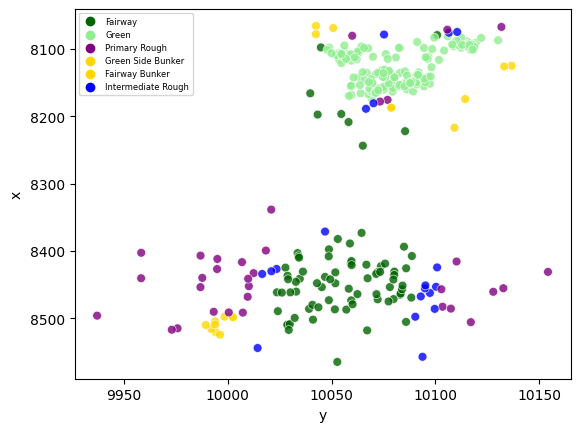

In [67]:
temp_df = tempGeoDf(df,3)

ax = sns.scatterplot(x='y', y='x', alpha=0.8, hue='to_location_scorer', data=temp_df, s=40,palette=custom_colors)
ax.legend(fontsize='6', loc='upper left')#title='Lie Location'
ax.invert_yaxis()
plt.show()

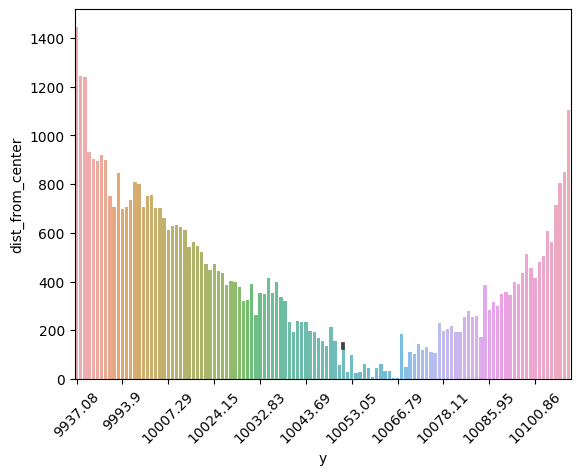

In [68]:
temp_df = tempGeoDf(df,3)
temp_df = temp_df[temp_df['shot'] == 1]

#change this toonly shots off the tee, then feet to yards, then 
sns.barplot(y='dist_from_center', x='y', alpha=0.8, data=temp_df)
plt.xticks(ticks=plt.xticks()[0][::len(temp_df['y'].unique()) // 10], rotation=45)  # Adjust 10 as needed
plt.show()

## **Convex Hulls**

## **Dog Legs**

x, y even orienated correctly? lol

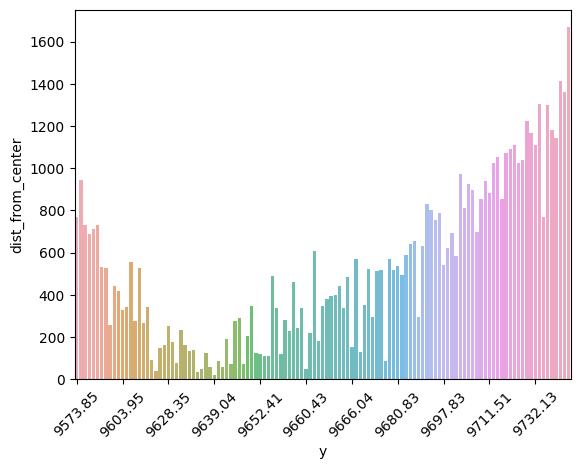

In [69]:
temp_df = tempGeoDf(df,12)
temp_df = temp_df[temp_df['shot'] == 1]


#change this toonly shots off the tee, then feet to yards, then 
sns.barplot(y='dist_from_center', x='y', alpha=0.8, data=temp_df)
plt.xticks(ticks=plt.xticks()[0][::len(temp_df['y'].unique()) // 10], rotation=45)  # Adjust 10 as needed
plt.show()

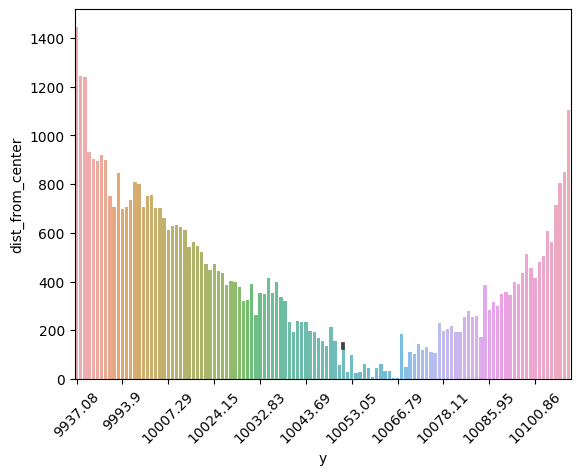

In [54]:
temp_df = df[df['hole'] == 3] #9 left too, 
temp_df = temp_df[temp_df['shot'] == 1]
temp_df = temp_df[temp_df['x'] != 0]
temp_df = temp_df[temp_df['y'] != 0]

sns.barplot(y='dist_from_center', x='y', alpha=0.8, data=temp_df)
plt.xticks(ticks=plt.xticks()[0][::len(temp_df['y'].unique()) // 10], rotation=45)  # Adjust 10 as needed
plt.show()

# Distance to center and edge eda

### **Key Takeaways**

- Use 'x', 'y', 'to_location_scorer', and 'to_location_laser' for visualization as they are 1 stroke ahead
- Use 'from_location_scorer' and 'from_location_laser' for predicting
- Try out shifts on "from_' in the future to get the same results as 'to_': temp_df['from_location_scorer'].shift(-1)